Equipe SNT -  2nde - LLG 974 

SQ5 - Géolocalisation - S3

# TP calcul d'itinéraires

# 0. Présentation des attendus du TP

Vous aviez dans le TP précédent (semaine S2) tracé des lignes brisées entre 3 sites parisiens de façon à visualiser grossièrement des itinéraires « à vol d’oiseau »: une boucle entre le centre géographique de la ville de Paris, le point zéro des routes de France et l'assemblée nationale.

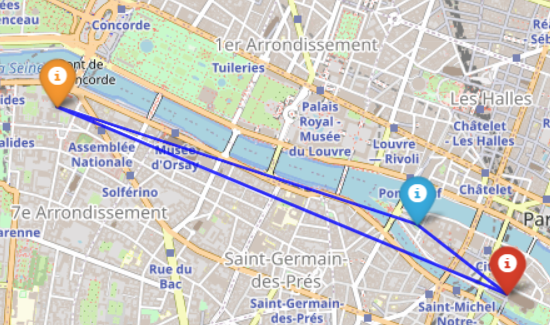

Dans cette partie I.1, vous allez tracer à l'aide de Python un itinéraire précis à pied entre 2 lieux:
1. Départ: le centre géographique de Paris
2. Arrivée: l'assemblée nationale

Dans la partie I.2, vous allez rajouter le point zéro des routes de France comme lieu de passage entre les points de départ et d'arrivée précédents.

Dans la partie II, vous aurez à préparer l'itinéraire permettant de 

# I. 1ère partie: Utilisation de Python pour trouver l'itinéraire le plus court entre 2 points d'une carte numérique 

##  I.1. Itinéraire entre le centre géographique de Paris et l'assemblée nationale

**Exécutez** le fragment de code ci-après

In [1]:
import folium    # Importation de la bibliothèque folium qui contient des fonctions (méthodes) permettant d'agir 
                 # sur des cartes numériques
    
# affectation des coordonnées GPS d'un lieu dans une variable
centre_geographique_Paris = (48.85646, 2.34263)
Point_zero = (48.8533249, 2.3488596)
Assemblee_nationale = (48.8617608, 2.3179738)

# Chargement d'une carte OSM
carte_Paris = folium.Map(location=centre_geographique_Paris, width='80%', height='80', tiles="OpenStreetMap", zoom_start=14)

# Placement des marqueurs
folium.Marker(centre_geographique_Paris, popup="Centre geographique de Paris", icon=folium.Icon(color='blue')).add_to(carte_Paris) 
folium.Marker(Point_zero, popup="Point zero des routes de France ", icon=folium.Icon(color='red')).add_to(carte_Paris)  
folium.Marker(Assemblee_nationale, popup="Assemblee nationale ", icon=folium.Icon(color='orange')).add_to(carte_Paris)  

# Affichage de la carte
carte_Paris

Vous retrouvez le travail que vous avez réalisé dans la 1ère partie du TP de la semaine S2: une carte de Paris centrée sur le centre géographique de Paris ainsi qu'un marqueur sur chacun des 3 lieux qui nous ont intéressés (centre géogrpahique de Paris, point zéros des routes de France et l'assemblée nationale).

Afin de rajouter sur cette carte l'itinéraire en voiture entre le centre géographique de Paris et l'assemblée nationale, **exécutez** le fragment de code ci-après.

Des commentaires ont été rajoutés pour une meilleure lisibilité du code.

**ATTENTION:** L'exécution du code peut être long. De l'ordre de 3 à 7 minutes, voire plus, selon les capacités de votre PC.

In [2]:
from pyroutelib3 import Router   # Importation du module Router: celui-ci correspond à une partie de la bibliothèque 
                 # pyroutelib3 qui contient des fonctions (méthodes) permettant de calculer et tracer des itinéraires
                 # sur des cartes numériques

print("debut routage, veuillez patientez svp ...") # Alerte permettant de vous indiquer que l'exécution du calcul 
                 # d'itinéraire a débuté (le calcul est long ...)

router = Router("car")  # option de routage en voiture. On aurait pu demander un itinéraire à pied.

depart = router.findNode(centre_geographique_Paris[0], centre_geographique_Paris[1])   # définition du point de départ
                     # de l'itinéraire: ici, le centre géographique de Paris, en spécifiant sa latitude et sa longitude


arrivee = router.findNode(Assemblee_nationale[0], Assemblee_nationale[1])    # définition du point de d'arrivée
                     # de l'itinéraire: ici, l'assemblée nationale, en spécifiant sa latitude et sa longitude


status, route = router.doRoute(depart, arrivee)   # C'est cette instruction qui permet de calculer l'itinéraire demandé 
                                                  # en estimant des points de passage. Une partie de l'algorithme utilisé 
                                                  # ici exploite l'algorithme de Dijkstra
        
# Cette pseudo fonction, qu'on appelle "méthode", renvoie 2 variables: status et route. 
# La variable status permet de savoir si le calcul d'itinéraire a abouti ou non.
# La variable route recueille l'ensemble des résultats issus du calcul de l'itinéraire.

# Les lignes suivantes vérifient si le calcul a abouti à partir d'un test. 

if status == 'success':    # Si le calcul a abouti
    print("route trouvée")  # la phrase "route trouvée" est affichée
    routeLatLons = list(map(router.nodeLatLon, route))   # le programme regroupe dans la même variable routeLatLons 
                                                         # les coordonnées de tous les points de passage trouvés
else:                      # Sinon (ou autrement dit, si le calcul n'a pas abouti)
    print("route pas trouvée !")   # la phrase "route pas trouvée" est affichée
    print(routeLatLons)   # Les points de passage calculés partiellement sont affichés
    
# La boucle for ci-dessous permet d'associer à chaque point de passage de la variable routeLatLons un marqueur rouge 
for coord in routeLatLons:
    coord=list(coord)
    folium.CircleMarker(coord,radius = 3,fill=True, color='red' ).add_to(carte_Paris)

# Tracé d'une ligne brisée de couleur bleue entre 2 points de passage successifs
folium.PolyLine(routeLatLons, color="blue", weight=2.5, opacity=1).add_to(carte_Paris)    

debut routage, veuillez patientez svp ...
route trouvée


Si votre code a bien compilé, vous devez lire le contenu de l'image ci-après puisque l'itinéraire aura été trouvé. 

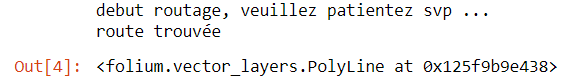

Il ne se passe donc rien, mais cela est normal puisque vous venez de renvoyer la modification demandée (rajout d'un itinéraire) à la variable "carte_Paris" en mémoire: vous aviez déjà observé ce comportement lors du TP précédent.

Avant d'afficher la carte attendue, **répondez** à la question suivante dans la zone ci-dessous.

**Dans le programme précédent, quelle instruction utilise l'algorithme de Dijkstra vu en cours ?**

Affichez la carte de Paris mise à jour en **exécutant** le fragment de code ci-après

In [3]:
# Affichage de la carte mise à jour
carte_Paris

Vous observez sur votre itinéraire des points de passage de couleur rouge et des lignes brisés de couleur bleues. **N'hésitez pas** à faire un zoom pour mieux visualiser ces points de passage.

**Quelles sont les lignes d'instruction du programme précédent qui ont permis l'affichage de ces points de passage et des lignes brisées ?**

Vous renseignez les numéros des lignes du programme en question dans la zone ci-dessous. 

## I.2 Itinéraire présentant des lieux de passage intermédiaires 

Dans cette partie, on souhaite tracer le même itinéraire précédant, toujours en voiture, mais cette fois-ci en passant par le point zéro des routes de France.

Vous pourriez, pour cela, exécuter indépendammant chaque itinéraire: le 1er du centre géographique de Paris au point zéro des routes de France et le 2nd, de ce dernier à l'assemblée nationale. Les 2 itinéraires se superposeront sur la carte que vous avez définie initialement.

Mais il est plus pertinent d'automatiser le calcul afin que le programme s'applique pour un nombre important de lieux de passage. Pour cela, une boucle **while** que vous avez vue en mathématiques peut être utilisée ainsi que la notion de **fonction**.

**Exécutez** le fragment de code ci-après. 

In [4]:
def calcul_itineraire(X, Y):
    router = Router("car")
    depart = router.findNode(X[0], X[1])
    arrivee = router.findNode(Y[0], Y[1])
    status, route = router.doRoute(depart, arrivee)
    if status == 'success':
        print("route trouvée")
        routeLatLons = list(map(router.nodeLatLon, route))
    else:
        print("route pas trouvée !")
        print(routeLatLons)
    for coord in routeLatLons:
        coord=list(coord)
        folium.CircleMarker(coord,radius = 3,fill=True, color='red' ).add_to(carte_Paris)
    folium.PolyLine(routeLatLons, color="blue", weight=2.5, opacity=1).add_to(carte_Paris) 

Le fragment de code précédent définie une fonction nommée "calcul_itineraire" qui permet de calculer le meilleur itinéraire entre 2 lieux nommés "X" et "Y". Vous remarquez que le bloc d'instruction contient les instructions que vous avez utilisées dans le paragraphe précédent.

L'idée est d'utiliser cette fonction dans une boucle **while** afin de calculer et afficher une multitude d'itinéraire à partir d'un seul appel.

**Analysez** le fragment de code suivant.

In [5]:
site_Paris =  [centre_geographique_Paris, Point_zero, Assemblee_nationale]

print("debut routage, veuillez patientez svp ...") 

i = 0 

while i < len(site_Paris)-1:
    calcul_itineraire(site_Paris[i], site_Paris[i+1])
    i = i+1

debut routage, veuillez patientez svp ...
route trouvée
route trouvée


Si votre code a bien compilé, vous devez lire le contenu de l'image ci-après puisque l'itinéraire aura été trouvé.
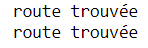

**Expliquez** pour quelle raison la phrase "route trouvée" est-elle indiquée 2 fois.

**Affichez** la carte mise à jour en exécutant la cellule ci-dessous.

In [6]:
carte_Paris

L'itinéraire proposé est simulé dans le cas d'un parcours en voiture. **Expliquez** pour quelle raison le trajet affiché sur votre carte semble t'il tortueux? **Déduisez** de votre reflexion la contrainte qui a été imposée dans l'algorithme de Dijkstra.  

# II. Itinéraire touristique dont la thématique est la mémoire de l'esclavage dans l'île de la Réunion

Nous revenons à notre itinéraire touristique évoqué lors du TP précédent. Nous souhaitons ici, tracer l'itinéraire touristique que vous pourriez proposer à des touristes en visite à l'île de La Réunion. Le thème des visites est en lien avec la mémoire de l'esclavage. 

Lors du TP denier, vous avez relié quelques sites mémoriaux de l'île par des lignes brisées. Cela avait comme intérêt de localiser les différents sites mémoriaux et d'estimer un itinéraire à vol d'oiseau. Irréalisable donc à pied ou en voiture.

Dans cette partie, vous allez essayer de tracer un itinéraire précis en voiture. 

**RETENEZ** pour la suite que la fonction "calcul_itineraire(X, Y)" construite dans la partie précédente est toujours en mémoire. Vous pouvez donc l'appeler à bon escient.

**Exécutez** le fragment de code ci-après.

In [10]:
# affectation des coordonnées GPS d'un lieu dans une variable
Piton_des_neiges = (-21.0994461, 55.4800341)
Prefecture = (-20.8781902, 55.4476252)
Memorial_EntreDeux = (-21.2489747, 55.4706865)
Musee_Villele = (-21.05645, 55.26354)
Revolte_Saint_Leu = (-21.166511, 55.287337)
Cimetiere_Saint_Paul = (-21.013813, 55.261425)
Cimetiere_Lafosse = (-21.283213, 55.396766)
Chemin_Cremont = (-20.922672, 55.346802)

# Chargement d'une carte OSM
carte_Reunion = folium.Map(location=Piton_des_neiges, width='80%', height='80%', tiles="OpenStreetMap", zoom_start=10)

# Placement des marqueurs
folium.Marker(Piton_des_neiges, popup="Piton_des_neiges", icon=folium.Icon(color='green')).add_to(carte_Reunion)
folium.Marker(Prefecture, popup="Prefecture de Saint-Denis", icon=folium.Icon(color='blue')).add_to(carte_Reunion)
folium.Marker(Memorial_EntreDeux, popup="Memorial esclavage Entre Deux", icon=folium.Icon(color='black')).add_to(carte_Reunion)
folium.Marker(Musee_Villele, popup="Musee de villele", icon=folium.Icon(color='black')).add_to(carte_Reunion)
folium.Marker(Revolte_Saint_Leu, popup="Memorial révolte des esclaves de 1811 a St Leu", icon=folium.Icon(color='black')).add_to(carte_Reunion)
folium.Marker(Cimetiere_Saint_Paul, popup="Le cimetiere des esclaves oublies a Saint-Paul ", icon=folium.Icon(color='black')).add_to(carte_Reunion)
folium.Marker(Cimetiere_Lafosse, popup="Le cimetiere du Pere-Lafosse, également appelé cimetière des Âmes perdues", icon=folium.Icon(color='black')).add_to(carte_Reunion)
folium.Marker(Chemin_Cremont, popup="Le depart du chemin des anglais ou Chemin Cremont construit par des esclaves a la possession", icon=folium.Icon(color='black')).add_to(carte_Reunion)

# Affichage de la carte
carte_Reunion


Si votre carte de la Réunion s'affiche bien, vous retrouvez le travail que vous avez réalisé lors du TP dernier.

A partir de ce que vous avez réalisé dans la partie I, **proposer** dans la cellule ci-après le fragment de code qui pemettra de tracer l'itinéraire précis, en voiture, allant de la préfecture de Saint Denis jusqu'au cimetière des oubliés de Saint Paul en passant par le départ du chemin des anglais (chemin Cremont).

**ATTENTION**: le temps de calcul de l'itinéraire peut être très long en fonction de la puissance de votre machine ainsi que du moment de la journée où vous exécutez votre programme.

In [12]:

site_esclavage = [Prefecture, Chemin_Cremont, Cimetiere_Saint_Paul]

print("debut routage, veuillez patientez svp ...")

i = 0 

while i < len(site_esclavage)-1:
    calcul_itineraire(site_esclavage[i], site_esclavage[i+1])
    i = i+1
    
# Affichage de la carte
carte_Reunion




debut routage, veuillez patientez svp ...
route trouvée
route trouvée


Si vous constatez que le temps de calcul est rapide, **vous pouvez vous amuser à tracer** l'itinéraire complet qui partirait de la préfecture de Saint-Denis jusqu'au mémorial de l'entre-deux en passant par tous les sites côtiers. Dans l'ordre: Prefecture, Chemin_Cremont, Cimetiere_Saint_Paul, Musee_Villele, Revolte_Saint_Leu, Cimetiere_Lafosse, Memorial_EntreDeux.

In [13]:

site_esclavage = [Prefecture, Chemin_Cremont, Cimetiere_Saint_Paul, Musee_Villele, Revolte_Saint_Leu, Cimetiere_Lafosse, Memorial_EntreDeux]

print("debut routage, veuillez patientez svp ...")

i = 0 

while i < len(site_esclavage)-1:
    calcul_itineraire(site_esclavage[i], site_esclavage[i+1])
    i = i+1
    
# Affichage de la carte
carte_Reunion


debut routage, veuillez patientez svp ...
route trouvée
route trouvée
route trouvée
route trouvée
route trouvée
route trouvée
